## import modules

In [293]:
import pandas as pd
import numpy as np

In [294]:
df = pd.read_csv('train.csv',sep=',')
df_test = pd.read_csv('test.csv', sep= ',')
df['train_test'] = 0
df_test['train_test'] = 1
df_test['Survived'] = np.NaN
l = list(df_test.columns[0:-1])
l.insert(1,'Survived') 
df_test = df_test[l]
# merge_df = pd.concat([df,df_test])

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [296]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  train_test   418 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [297]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_category = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

## Data exploration

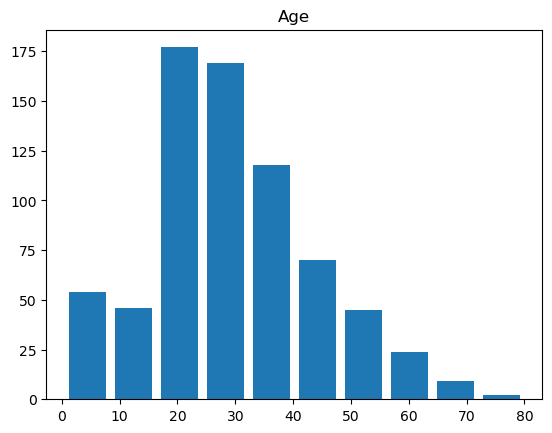

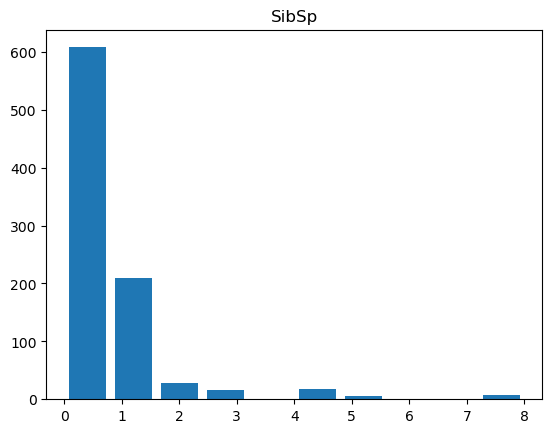

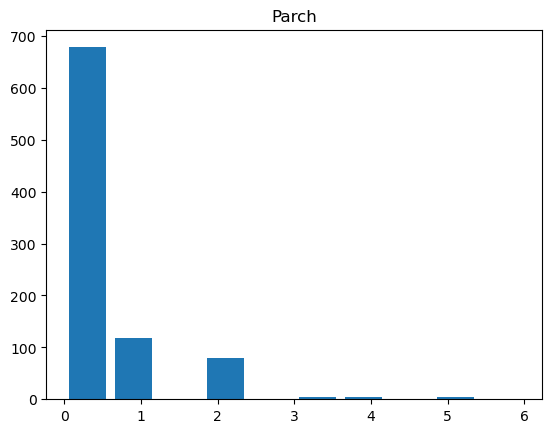

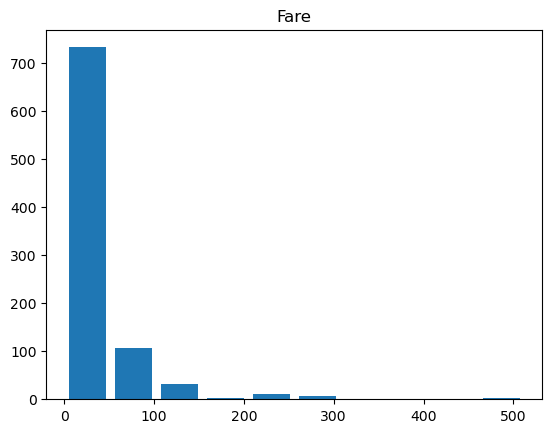

In [298]:
import matplotlib.pyplot as plt
for i in df_num.columns:
    plt.hist(df_num[i],rwidth=0.8)
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

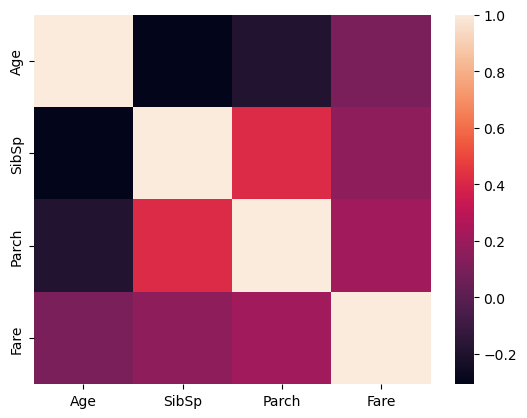

In [299]:
import seaborn as sns
print(df_num.corr())
sns.heatmap(df_num.corr())

In [300]:
pd.pivot_table(df,index = 'Survived',values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


c:\Users\jeffrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


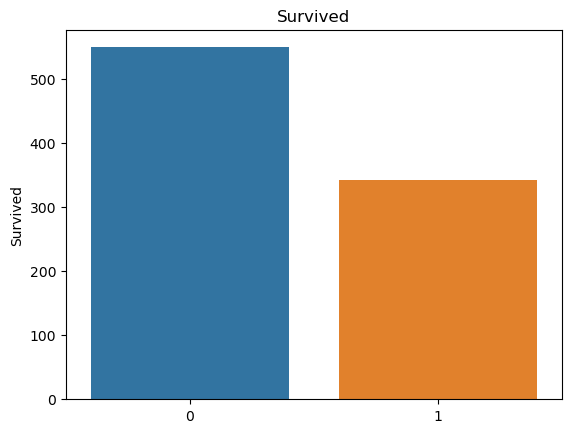

c:\Users\jeffrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


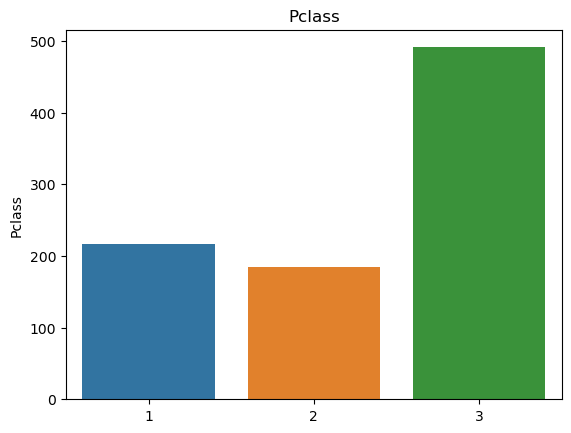

c:\Users\jeffrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


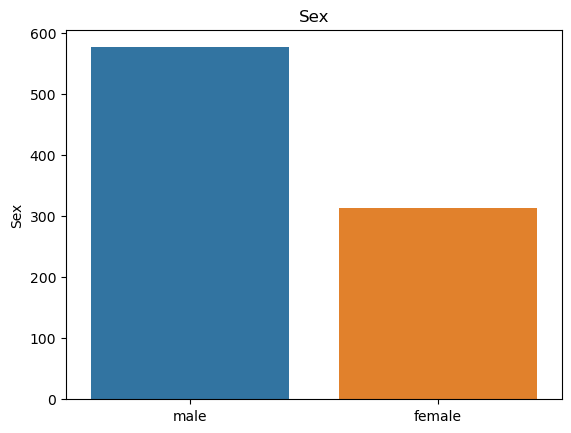

c:\Users\jeffrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


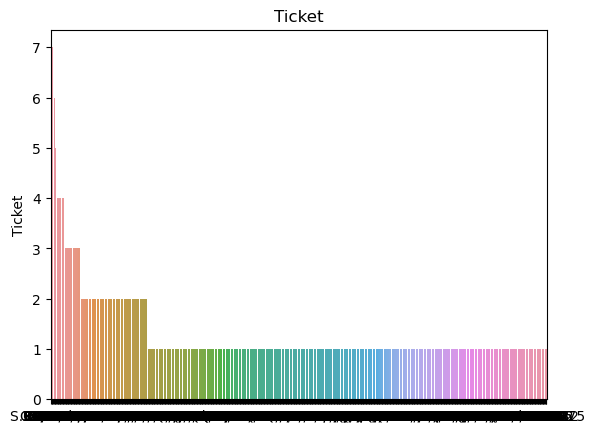

c:\Users\jeffrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


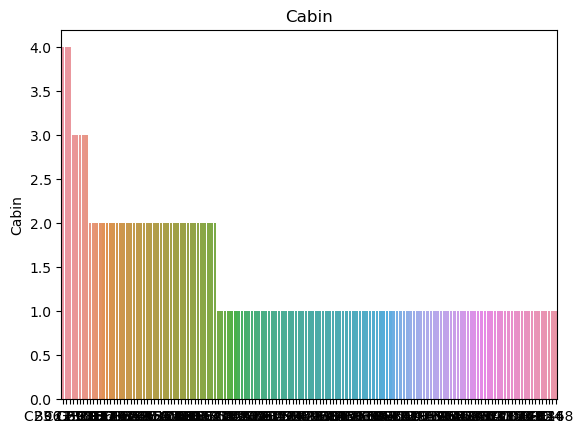

c:\Users\jeffrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


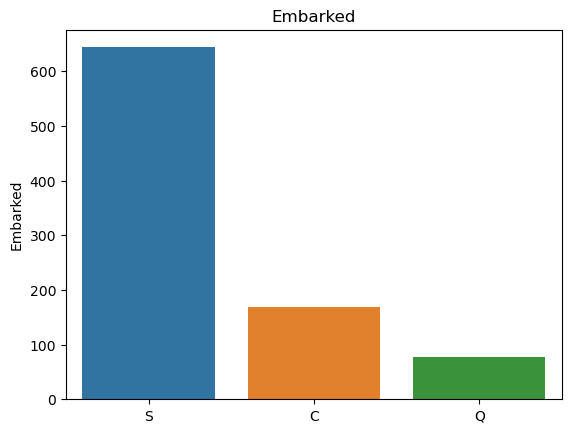

In [301]:
for i in df_category.columns:
    sns.barplot(df_category[i].value_counts().index,df_category[i].value_counts()).set_title(i)
    plt.show()

In [302]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering

# 1. Find out does name title and last name affect survival?

In [303]:
df.tail(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,0
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
864,865,0,2,"Gill, Mr. John William",male,24.0,0,0,233866,13.0000,NaN,S,0
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S,0
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,0
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,0
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S,0


In [304]:
df['name_title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [305]:
df['last_name'] = df['Name'].apply(lambda x: x.split(',')[0])
df['last_name'].value_counts(ascending = True)

Niskanen     1
Butt         1
LeRoy        1
Risien       1
Frolicher    1
            ..
Skoog        6
Panula       6
Johnson      6
Sage         7
Andersson    9
Name: last_name, Length: 667, dtype: int64

# 2. understand cabin

In [306]:
#check how many nan in column cabin
df['Cabin_multi'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['Cabin_multi'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multi, dtype: int64

In [307]:
pd.pivot_table(df,index='Survived',columns='Cabin_multi',values='Ticket',aggfunc ='count')

Cabin_multi,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [308]:
df['cabin_abv'] = df['Cabin'].apply(lambda x: str(x)[0])
print(df['cabin_abv'].value_counts())
pd.pivot_table(df, index='Survived',columns='cabin_abv',values='PassengerId',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_abv, dtype: int64


cabin_abv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


# 3. understand ticket types 
First We check if the ticket contains letters,next separate tickets with contains letters and only numeric in order to 
create columns(numeric_ticket,Ticket_withletters)

In [309]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,name_title,last_name,Cabin_multi,cabin_abv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Braund,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,Cumings,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Heikkinen,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,Futrelle,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Allen,0,n
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,Mr,Moran,0,n
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Mr,McCarthy,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,Master,Palsson,0,n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,Mrs,Johnson,0,n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,Mrs,Nasser,0,n


In [310]:
df['Ticket'].apply(lambda x: True if x.isnumeric() else False).value_counts()

True     661
False    230
Name: Ticket, dtype: int64

In [311]:
df['numeric_ticket'] = df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df['Ticket_letters'] = df['Ticket'].apply(lambda x: x.split()[0] if x.isnumeric() == False else 0)

In [312]:
print(df.loc[df['Ticket_letters']!=0,'Ticket_letters'].unique())

['A/5' 'PC' 'STON/O2.' 'PP' 'A/5.' 'C.A.' 'A./5.' 'SC/Paris' 'S.C./A.4.'
 'A/4.' 'CA' 'S.P.' 'S.O.C.' 'SO/C' 'W./C.' 'SOTON/OQ' 'W.E.P.' 'STON/O'
 'A4.' 'C' 'SOTON/O.Q.' 'SC/PARIS' 'S.O.P.' 'A.5.' 'Fa' 'CA.' 'LINE'
 'F.C.C.' 'W/C' 'SW/PP' 'SCO/W' 'P/PP' 'SC' 'SC/AH' 'A/S' 'A/4' 'WE/P'
 'S.W./PP' 'S.O./P.P.' 'F.C.' 'SOTON/O2' 'S.C./PARIS' 'C.A./SOTON']


check the ticket type from df_test numeric or non_numeric(with letters)

In [313]:
df_test['Ticket'].apply(lambda x: True if x.isnumeric() else False).value_counts()

True     296
False    122
Name: Ticket, dtype: int64

In [314]:
df_test['numeric_ticket'] = df_test['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df_test['Ticket_letters'] = df_test['Ticket'].apply(lambda x: x.split()[0] if x.isnumeric() == False else 0)
print(df_test.loc[df_test['Ticket_letters']!=0,'Ticket_letters'].unique())

['A/4' 'W.E.P.' 'SC/PARIS' 'STON/O2.' 'PC' 'C' 'A/5.' 'SC/AH' 'C.A.'
 'W./C.' 'SOTON/O.Q.' 'STON/O' 'SC/A.3' 'F.C.C.' 'F.C.' 'A./5.' 'PP'
 'STON/OQ.' 'SOTON/OQ' 'CA' 'SC/A4' 'S.O./P.P.' 'CA.' 'S.O.C.' 'SOTON/O2'
 'AQ/4' 'A.' 'SC' 'A/5' 'SC/Paris' 'LP' 'AQ/3.' 'S.C./PARIS' 'A.5.']


In [315]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,name_title,last_name,Cabin_multi,cabin_abv,numeric_ticket,Ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,Braund,0,n,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,Cumings,1,C,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Heikkinen,0,n,0,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,Futrelle,1,C,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Allen,0,n,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev,Montvila,0,n,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss,Graham,1,B,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss,Johnston,0,n,0,W./C.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr,Behr,1,C,1,0


# 4. understand survival rate among gender and classify different age

Classify different ages into under 20, over 40, between 20 to 40

In [316]:
women = df.loc[df['Sex'] == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = df.loc[df['Sex'] == 'male']["Survived"]
rate_men = sum(men)/len(men)

print('rate_women:',rate_women)
print('rate_men',rate_men)

rate_women: 0.7420382165605095
rate_men 0.18890814558058924


In [317]:
df['age_sep'] = 0
for i, age in enumerate(df['Age']):
    if age < 20:
        df.loc[i,'age_sep'] = 'under20'
    elif age > 40:
        df.loc[i,'age_sep'] = 'over40'
    else:
        df.loc[i,'age_sep'] = 'youngadult'
pd.pivot_table(df, index='Survived',columns='age_sep',values='PassengerId',aggfunc='count')

age_sep,over40,under20,youngadult
Survived,,,
0,95,85,369
1,55,79,208


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             714 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  train_test      891 non-null    int64  
 13  name_title      891 non-null    object 
 14  last_name       891 non-null    object 
 15  Cabin_multi     891 non-null    int64  
 16  cabin_abv       891 non-null    object 
 17  numeric_ticket  891 non-null    int

# Data Preprocessing
Drop two nan row from column embarked <br>
Drop columns like passengerid, name

In [319]:
#catgorize variables from feature engineering and apply to df_test 
df_test['name_title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_test['last_name'] = df_test['Name'].apply(lambda x: x.split(',')[0])
df_test['Cabin_multi'] = df_test['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df_test['cabin_abv'] = df_test['Cabin'].apply(lambda x: str(x)[0])
df_test['numeric_ticket'] = df_test['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df_test['Ticket_letters'] = df_test['Ticket'].apply(lambda x: x.split()[0] if x.isnumeric() == False else 0)
df_test['age_sep'] = 0

for i, age in enumerate(df_test['Age']):
    if age < 20:
        df_test.loc[i,'age_sep'] = 'under20'
    elif age > 40:
        df_test.loc[i,'age_sep'] = 'over40'
    else:
        df_test.loc[i,'age_sep'] = 'youngadult'

#merge df and df_test      
merge_df = pd.concat([df,df_test])       
#drop null values from 'embarked' rows. 
merge_df['Embarked'].dropna(inplace=True)
# fill nan column age with median age
merge_df['Age'].fillna(merge_df['Age'].median(), inplace=True)
merge_df['Fare'].fillna(merge_df['Fare'].median(), inplace=True)

#Drop columns like PassengerId and Name
merge_df = merge_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
#label encoding 


In [320]:
# merge_df[merge_df['Age'].isnull()]
merge_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,name_title,last_name,Cabin_multi,cabin_abv,numeric_ticket,Ticket_letters,age_sep
0,0.0,3,male,22.0,1,0,7.2500,S,0,Mr,Braund,0,n,0,A/5,youngadult
1,1.0,1,female,38.0,1,0,71.2833,C,0,Mrs,Cumings,1,C,0,PC,youngadult
2,1.0,3,female,26.0,0,0,7.9250,S,0,Miss,Heikkinen,0,n,0,STON/O2.,youngadult
3,1.0,1,female,35.0,1,0,53.1000,S,0,Mrs,Futrelle,1,C,1,0,youngadult
4,0.0,3,male,35.0,0,0,8.0500,S,0,Mr,Allen,0,n,1,0,youngadult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,28.0,0,0,8.0500,S,1,Mr,Spector,0,n,0,A.5.,youngadult
414,NaN,1,female,39.0,0,0,108.9000,C,1,Dona,Oliva y Ocana,1,C,0,PC,youngadult
415,NaN,3,male,38.5,0,0,7.2500,S,1,Mr,Saether,0,n,0,SOTON/O.Q.,youngadult
416,NaN,3,male,28.0,0,0,8.0500,S,1,Mr,Ware,0,n,1,0,youngadult


In [321]:
merge_df_copy = merge_df.copy()
merge_df_copy = merge_df_copy.drop('Survived',axis = 1)

using get dummies for labeling

In [322]:
# dummies_df = pd.get_dummies(merge_df[['Pclass','Sex','Age','SibSp','Parch','Embarked','cabin_abv','Cabin_multi','numeric_ticket','Ticket_letters','name_title','last_name','train_test','age_sep']])
# dummies_df 

one hot encoding

In [323]:
merge_list = list(merge_df.columns)
merge_list.remove('Fare')
merge_list.remove('Age')
merge_list.remove('Survived')
merge_list
# age_sep, name_title do one hot encoding
merge_list.remove('age_sep')
merge_list.remove('name_title')

In [324]:
for i,name in enumerate(merge_list):
    c = f'c{i}'
    c = merge_df_copy[name].astype('category')
    merge_df_copy[name] = c.cat.codes
    if name == 'Embarked':
        d_Embarked = dict(enumerate(c.cat.categories))
        print(d_Embarked)
display(merge_df_copy)

{0: 'C', 1: 'Q', 2: 'S'}


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,name_title,last_name,Cabin_multi,cabin_abv,numeric_ticket,Ticket_letters,age_sep
0,2,1,22.0,1,0,7.2500,2,0,Mr,100,0,8,0,6,youngadult
1,0,0,38.0,1,0,71.2833,0,0,Mrs,182,1,2,0,23,youngadult
2,2,0,26.0,0,0,7.9250,2,0,Miss,329,0,8,0,44,youngadult
3,0,0,35.0,1,0,53.1000,2,0,Mrs,267,1,2,1,0,youngadult
4,2,1,35.0,0,0,8.0500,2,0,Mr,15,0,8,1,0,youngadult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,1,28.0,0,0,8.0500,2,1,Mr,753,0,8,0,3,youngadult
414,0,0,39.0,0,0,108.9000,0,1,Dona,593,1,2,0,23,youngadult
415,2,1,38.5,0,0,7.2500,2,1,Mr,699,0,8,0,40,youngadult
416,2,1,28.0,0,0,8.0500,2,1,Mr,827,0,8,1,0,youngadult


In [325]:
merge_df_dummies = pd.get_dummies(merge_df_copy[['age_sep','name_title']])
merge_df_dummies 

,age_sep_over40,age_sep_under20,age_sep_youngadult,name_title_Capt,name_title_Col,name_title_Don,name_title_Dona,name_title_Dr,name_title_Jonkheer,name_title_Lady,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
414,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
416,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [326]:
merge_df_copy = pd.concat([merge_df_copy,merge_df_dummies], axis = 1)
merge_df_copy = merge_df_copy.drop(columns = ['age_sep','name_title'])
merge_df_copy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,last_name,Cabin_multi,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,2,1,22.0,1,0,7.2500,2,0,100,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,38.0,1,0,71.2833,0,0,182,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0,26.0,0,0,7.9250,2,0,329,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,35.0,1,0,53.1000,2,0,267,1,...,0,0,0,0,0,1,0,0,0,0
4,2,1,35.0,0,0,8.0500,2,0,15,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,1,28.0,0,0,8.0500,2,1,753,0,...,0,0,0,0,1,0,0,0,0,0
414,0,0,39.0,0,0,108.9000,0,1,593,1,...,0,0,0,0,0,0,0,0,0,0
415,2,1,38.5,0,0,7.2500,2,1,699,0,...,0,0,0,0,1,0,0,0,0,0
416,2,1,28.0,0,0,8.0500,2,1,827,0,...,0,0,0,0,1,0,0,0,0,0


spilt train test df

In [327]:
X_train = merge_df_copy[merge_df_copy['train_test']==0].drop(['train_test'],axis=1)
X_test = merge_df_copy[merge_df_copy['train_test']==1].drop(['train_test'],axis=1)

y_train = merge_df[merge_df['train_test']==0]['Survived']
y_train.shape

(891,)

scaled data

In [328]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
merge_df_scaled = merge_df_copy
merge_df_scaled[['Age','Fare','last_name']] = scale.fit_transform(merge_df_scaled[['Age','Fare','last_name']])
merge_df_scaled

X_train_scaled = merge_df_scaled[merge_df_scaled['train_test']==0].drop(['train_test'],axis = 1)
X_test_scaled = merge_df_scaled[merge_df_scaled['train_test']==1].drop(['train_test'],axis = 1)
y_train = merge_df[merge_df['train_test']==0]['Survived']
y_train.shape

(891,)

# model build

In [329]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [330]:
# train test split
# from sklearn.model_selection import train_test_split
#train, test = train_test_split(df1, test_size=0.2, random_state=1)
# xtrain, xtest, ytrain, ytest = train_test_split( X_train_scaled, y_train_scaled,test_size=0.2,
#                                                 random_state=1)
# Try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 5) #set model parameters max_depth = The maximum depth of the tree, the bigger the better classification
rf.fit(X_train_scaled,y_train)
y_pred=rf.predict(X_test_scaled)

In [331]:
#try xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cross_val = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cross_val)
print(cross_val.mean())
xgb.fit(X_train_scaled,y_train)
y_pred = xgb.predict(X_test_scaled)

[0.82681564 0.78651685 0.8258427  0.80898876 0.84269663]
0.8181721172556651


In [332]:
#try KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

[0.80446927 0.78089888 0.73033708 0.78089888 0.80337079]
0.779994978344109


c:\Users\jeffrey\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\jeffrey\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [333]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

[0.8547486  0.81460674 0.79213483 0.8258427  0.83707865]
0.824882304940054


In [334]:
gnb = GaussianNB(var_smoothing=1e-9)
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
gnb.fit(X_train_scaled,y_train)
y_pred = gnb.predict(X_test_scaled)

[0.64804469 0.71910112 0.78651685 0.7752809  0.69101124]
0.7239909610193962


In [335]:
dt = tree.DecisionTreeClassifier(random_state = 2, max_depth=10)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
dt.fit(X_train_scaled,y_train)
y_pred = dt.predict(X_test_scaled)

[0.79888268 0.78089888 0.80898876 0.7752809  0.78089888]
0.7889900194589166


In [336]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())
svc.fit(X_train_scaled,y_train)
y_pred = svc.predict(X_test_scaled)

[0.73743017 0.74719101 0.71910112 0.7752809  0.79213483]
0.7542276065532609


In [337]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [338]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83240223 0.80898876 0.80898876 0.80337079 0.85955056]
0.8226602222082733


In [339]:
voting_clf.fit(X_train_scaled,y_train)
y_pred = voting_clf.predict(X_test_scaled).astype(int)
# basic_submission = {'PassengerId': df_test['PassengerId'], 'Survived': y_hat_base_vc}
# base_submission = pd.DataFrame(data=basic_submission)
# base_submission.to_csv('base_submission.csv', index=False)

# predict the results<br>

submission4 (0.772) - xtrain_scaled, randomforest, max_depth = 5<br>
xgboost sub1 (0.741) - X_train_scaled, xgboost, max_depth = 5<br>
knn sub1 (0.729) - X_train_scaled, KNeighborsClassifier, max_depth = 5<br>
lr sub1 (0.758) -  X_train_scaled,  LogisticRegression, max_iter = 2000<br>
gnb sub1 (0.736) -  X_train_scaled, GaussianNB<br>
dt sub1 (0.734) - X_train_scaled, DecisionTreeClassifier, randomstate = 1<br>
dt sub2 (0.744) - X_train_scaled, DecisionTreeClassifier, randomstate = 2, max_depth = 10<br>
svc sub1 (0.703) -  X_train_scaled, Support Vector Classification<br>

In [341]:
test_predictions = y_pred.astype(int)
output = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':test_predictions})
output.to_csv('voting_clf3.csv',index=False)

lr2(0.765) features = 34 <br>
voting_clf3 (0.779)